In [1]:
!pip install mnist

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog 
from sklearn.metrics import accuracy_score
import random
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.svm import SVC
import math
from sklearn.preprocessing import StandardScaler
import cvxpy as cp
import sys
from random import seed
np.random.seed(1)
seed(1)
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn import svm
import math
import cvxopt
import mnist
from matplotlib import pyplot as plt

import cv2
import numpy as np
from PIL import Image

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog 
from sklearn.metrics import accuracy_score
import random
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.svm import SVC
import math
from sklearn.preprocessing import StandardScaler
import cvxpy as cp
import sys
from random import seed
np.random.seed(1)
seed(1)
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn import svm
import math
import cvxopt
import mnist
from matplotlib import pyplot as plt
import cv2

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import torch.nn.functional as F
import copy
from sklearn.utils import shuffle
from torch.utils.data import random_split
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog 
from sklearn.metrics import accuracy_score
import random
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.svm import SVC
import math
from sklearn.preprocessing import StandardScaler
import cvxpy as cp
import sys
from random import seed
np.random.seed(1)
seed(1)
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn import svm
import math
import cvxopt
import mnist
from matplotlib import pyplot as plt
#import tensorly as tl
#import tensorly.decomposition as decomp
import cv2

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import torch.nn.functional as F
import copy
from sklearn.utils import shuffle
from torch.utils.data import random_split
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from keras import models

In [240]:
def centroid(points):
    c = np.zeros(points.shape[1:])
    for i in range(points.shape[0]):
        c = c + points[i]
    return c/points.shape[0]


def visualise(w,shape):
    
    wsq=w.copy()
    wsq = scaler.inverse_transform(np.reshape(wsq,(1,128)))
    wsq = np.reshape(wsq,(1,4,4,8,))
    wsq = decoder.predict(wsq)
    wsq=np.reshape(wsq,(28,28))
    #print(wsq)
    plt.imshow(wsq, interpolation='nearest',cmap='gray')
    plt.show()


def visualise_pos(w,shape):
    return 
    wsq=w.copy()
    wsq=np.maximum(wsq, 0)
    wsq = (wsq - np.min(wsq)) / (np.max(wsq) - np.min(wsq))
    wsq=np.reshape(wsq,shape)
    plt.imshow(wsq, interpolation='nearest',cmap='gray')
    plt.show()

def visualise_neg(w,shape):
    return
    wsq=w.copy()
    wsq=np.minimum(wsq, 0)
    wsq = (wsq - np.min(wsq)) / (np.max(wsq) - np.min(wsq))
    wsq=np.reshape(wsq,shape)
    plt.imshow(wsq, interpolation='nearest',cmap='gray')
    plt.show()
    

def redoer(image, shape = (20,20), interpolation = cv2.INTER_CUBIC):
    assert(len(shape)==2)
    new_shape = (shape[1],shape[0])
    shape=new_shape
    reimage = cv2.resize(image, shape, interpolation=interpolation)
    if len(reimage.shape)==3:
        reimage = reimage.reshape((reimage.shape[0],reimage.shape[1]*reimage.shape[2]))
    return reimage

In [82]:
a=np.zeros((1,4,4,8))

In [85]:
print(np.reshape(decoder.predict(a),(28,28)).shape)

(28, 28)


In [6]:
def predict(X, w, b):
  return np.sign(inner_prod(w, X)+b).reshape(-1,1)
def accuracy(a,b):
  n=0
  for i in range(len(a)):
    if(a[i]==b[i]):
      n=n+1
  return n/len(a)
def getHyperPlaneFromTwoPoints(x1, x2):
  assert(x1.shape[0]==x2.shape[0])
  d = x1.shape[0]
  w = (2) * (x2 - x1) / (np.linalg.norm(x1 - x2) ** 2)
  #b = - np.dot(w , (0.5 * (x1 + x2)))
  b = -1 * inner_prod(w,(0.5 * (x1 + x2)))  
  return -w, -b

In [513]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from random import seed
np.random.seed(1)
seed(1)

def rank_R_decomp(X, rank = 3):
    X_t = tl.tensor(X)
    _, factors = parafac(X_t, int(rank))
    fact_np = [tl.to_numpy(f) for f in factors]
    return fact_np


def inner_prod_decomp(Ai, Aj):
    s = 0.0
    R = Ai[0].shape[1]
    for p in range(R):
        for q in range(R):
            prod = 1.0
            for ai, aj in zip(Ai, Aj):  
                prod *= np.dot(ai[:, p], aj[:, q])
            s += prod
    return s

def make_kernel(data_decomp):
    K = np.zeros((len(data_decomp), len(data_decomp)))
    for i in range(len(data_decomp)):
        for j in range(i+1):
            K[i, j] = inner_prod_decomp(data_decomp[i], data_decomp[j])
            K[j, i] = K[i, j]
    return K

def construct_W_from_mat(data_decomp, l, eps=1e-100):
    R = data_decomp[0][1].shape[1]
    W = tl.zeros([data_decomp[0][i].shape[0] for i in range(len(data_decomp[0]))])
    for i, flag in enumerate((np.abs(l) > eps)):
        if flag:
            W += l[i]*tl.cp_to_tensor((np.ones(R), data_decomp[i]))
    return tl.to_numpy(W)

In [514]:
import numpy as np
import cvxpy as cp
from random import seed
np.random.seed(1)
seed(1)

def construct_W_from_vec(W, shape):
    W = W.reshape(shape)
    return W
    

def inner_prod(A, B):
    if A.shape == B.shape:
        return np.sum(A*B)
    if A.shape == B.shape[1:]:
        ans = []
        for b in B:
            ans.append(np.sum(A*b))
        return ans
    
def inner_prod_cp(A, B):
    if A.shape == B.shape:
        return cp.sum(cp.multiply(A,B))
    if A.shape == B.shape[1:]:
        ans = []
        for b in B:
            ans.append(cp.sum(cp.multiply(A,B)))
        return ans

In [512]:
!pip install tensorly

     |████████████████████████████████| 198 kB 5.7 MB/s 
     |████████████████████████████████| 154 kB 27.4 MB/s 


In [516]:
def inner_mat(A, B, M = None):
    assert(A.shape==B.shape)
    M = A.shape[0] if M is None else M
    M = min(M, A.shape[0])
    mat = np.ones((M,M))
    for i in range(M):
        for j in range(M):
            xi = A[i]
            xj = B[j]
            mat[i,j] = np.sum(xi*xj)
    return mat
def inner_prod_cp(w,x):
    return cp.sum(cp.multiply(w,x))
def inner_prod(A, B):
    if A.shape == B.shape:
        return np.sum(A*B)
    if A.shape == B.shape[1:]:
        ans = []
        for b in B:
            ans.append(np.sum(A*b))
        return ans
def solver(X, y, C = 1, method='MCM_STM', r = None, flag = True, xa = None, xb = None, methodw = 'L2', methodq = 'L1'):
    method = 'MCM_STM'
    y = y.reshape(-1,1)
    assert(X.shape[0]==y.shape[0])
    if flag==False or len(X.shape)==2:
        if method == 'STM' or method == 'SHTM' or method == 'MCM_STM':
            w = np.ones(X.shape[1:])
            b = np.ones(y.shape[1:])
            M = X.shape[0]
            if method == 'STM':
                H = np.dot(y,y.T)*inner_mat(X,X)*1.0
            elif method == 'SHTM':
                r = r if r is not None else 1
                H = np.dot(y,y.T)*inner_mat(X, X, r, method='SHTM')*1.0
            P_ = cvxopt.matrix(H)
            q_ = cvxopt.matrix(-np.ones((M,1)))
            G_ = cvxopt.matrix(np.vstack((np.eye(M)*-1,np.eye(M))))
            h_ = cvxopt.matrix(np.hstack((np.zeros(M), np.ones(M)*C)))
            A_ = cvxopt.matrix(y.reshape(1,-1).astype('float'))
            b_ = cvxopt.matrix(np.zeros(1)) 
            sol = cvxopt.solvers.qp(P_, q_, G_, h_, A_, b_, options={'show_progress': False})
            alphas = np.array(sol['x'])
            w = np.tensordot((y*alphas).T, X, axes = ((1),(0))).reshape(X.shape[1:]) 
            b = -0.5*(max(inner_prod(w, X[(y==-1).reshape(-1)])) + min(inner_prod(w, X[(y==1).reshape(-1)])))
            return w, b
    else:
        #only works for greyscale right now
        xa = xa if xa is not None else np.zeros(X.shape[0])
        xb = xb if xb is not None else np.zeros(X.shape[0])
        assert(xa is not None)
        assert(xb is not None)
        assert(len(X.shape)<=3)
        if len(X.shape)==3:
            if method == 'MCM_STM':
                w = cp.Variable(X.shape[1:])
                b = cp.Variable((1,1))
                wa = cp.Variable((1,1))
                wb = cp.Variable((1,1))
                qi = cp.Variable(y.shape)
                h = cp.Variable((1,1))
                if methodq == 'L1':
                    term2 = cp.sum(qi)*C
                elif methodq == 'L0':
                    term2 = 0
                    for i in range(y.shape[0]):
                        term2 += cp.maximum(0,cp.sign(qi[i]))*C
                objfun = cp.Minimize(h + term2)
                constraints = []
                maxes = np.max(X, axis=0)
                mines = np.min(X, axis= 0)
                #for i in range(X.shape[1]):
                    #for j in range(X.shape[2]):
                        #mines[i][j] = -1 * maxes[i][j]
                #print(mines)
                for i in range(X.shape[1]):
                    for j in range(X.shape[2]):
                        constraints+=[w[i][j]<=maxes[i][j], mines[i][j]<=w[i][j]]
                for i in range(X.shape[0]):
                    constraints+=[cp.multiply(y[i],(inner_prod_cp(w,X[i]) + b + cp.multiply(wa,xa[i]) + cp.multiply(wb,xb[i])))+qi[i] >= 1.0, \
                        cp.multiply(y[i],(inner_prod_cp(w,X[i]) + b + cp.multiply(wa,xa[i]) + cp.multiply(wb,xb[i])))+qi[i] <= h, qi[i]>=0]
                problem = cp.Problem(objfun,constraints)
                problem.solve(verbose=False)
                #print(w.value)
                return w.value, b.value, wa.value, wb.value
                #MCTM(X, y, C = C, rank = 3, xa = xa, xb = xb, constrain = 'lax', wnorm = 'L1')
            if method == 'STM' or method == 'SHTM':
                w = cp.Variable(X.shape[1:])
                b = cp.Variable((1,1))
                wa = cp.Variable((1,1))
                wb = cp.Variable((1,1))
                qi = cp.Variable(y.shape)
                if methodq == 'L1':
                    term2 = cp.sum(qi)*C
                elif methodq == 'L0':
                    term2 = 0
                    for i in range(y.shape[0]):
                        term2 += cp.maximum(0,cp.sign(qi[i]))*C
                if methodw == 'L2':
                    term1 = 1/2*cp.norm2(w)
                    term3 = 1/2*(cp.square(wa)+cp.square(wb))
                elif methodw == 'L1':
                    term1 = cp.norm1(w)
                    term3 = cp.abs(wa)+cp.abs(wb)
                elif methodw == 'L0':
                    term1 = 0
                    for i in range(X.shape[1]):
                        for j in range(X.shape[2]):
                            term1 += cp.maximum(0,cp.sign(w[i][j]))
                    term3 = cp.maximum(0,cp.sign(wa))+cp.maximum(0,cp.sign(wb))
                objfun = cp.Minimize(term1+term2+term3)
                constraints = []
                #constraints = y*(inner_prod_cp(w,X) + b + wa*xa + wb*xb) + qi >= 1
                #constraints += qi>=0
                maxes = np.max(X, axis=0)
                mines = np.min(X, axis= 0)
                #for i in range(X.shape[1]):
                    #for j in range(X.shape[2]):
                        #mines[i][j] = 0
                for i in range(X.shape[1]):
                    for j in range(X.shape[2]):
                        constraints+=[w[i][j]<=maxes[i][j], mines[i][j]<=w[i][j]]
                for i in range(X.shape[0]):
                    constraints+=[cp.multiply(y[i],(inner_prod_cp(w,X[i]) + b + cp.multiply(wa,xa[i]) + cp.multiply(wb,xb[i])))+qi[i]>=1, qi[i]>=0]
                problem = cp.Problem(objfun,constraints)
                problem.solve()
                return w.value, b.value, wa.value, wb.value
            if method == 'neural':
                y_train = (y+1)/2
                model = Sequential()
                model.add(Dense(1, activation='tanh', kernel_initializer='he_uniform',input_shape = (784,)))
                opt = keras.optimizers.Adam(learning_rate=0.01)
                model.compile(optimizer=opt, loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                model.fit(X, to_categorical(y), epochs=30, validation_split=0.1, batch_size=128)
                
                w = cp.Variable(X.shape[1:])
                b = cp.Variable((1,1))
                wa = cp.Variable((1,1))
                wb = cp.Variable((1,1))
                qi = cp.Variable(y.shape)
                if methodq == 'L1':
                    term2 = cp.sum(qi)*C
                elif methodq == 'L0':
                    term2 = 0
                    for i in range(y.shape[0]):
                        term2 += cp.maximum(0,cp.sign(qi[i]))*C
                if methodw == 'L2':
                    term1 = 1/2*cp.norm2(w)
                    term3 = 1/2*(cp.square(wa)+cp.square(wb))
                elif methodw == 'L1':
                    term1 = cp.norm1(w)
                    term3 = cp.abs(wa)+cp.abs(wb)
                elif methodw == 'L0':
                    term1 = 0
                    for i in range(X.shape[1]):
                        for j in range(X.shape[2]):
                            term1 += cp.maximum(0,cp.sign(w[i][j]))
                    term3 = cp.maximum(0,cp.sign(wa))+cp.maximum(0,cp.sign(wb))
                objfun = cp.Minimize(term1+term2+term3)
                constraints = []
                #constraints = y*(inner_prod_cp(w,X) + b + wa*xa + wb*xb) + qi >= 1
                #constraints += qi>=0
                maxes = np.max(X, axis=0)
                mines = np.min(X, axis= 0)
                #for i in range(X.shape[1]):
                    #for j in range(X.shape[2]):
                        #mines[i][j] = 0
                for i in range(X.shape[1]):
                    for j in range(X.shape[2]):
                        constraints+=[w[i][j]<=maxes[i][j], mines[i][j]<=w[i][j]]
                for i in range(X.shape[0]):
                    constraints+=[cp.multiply(y[i],(inner_prod_cp(w,X[i]) + b + cp.multiply(wa,xa[i]) + cp.multiply(wb,xb[i])))+qi[i]>=1, qi[i]>=0]
                problem = cp.Problem(objfun,constraints)
                problem.solve()
                return w.value, b.value, wa.value, wb.value

def MCTM(X, y, C = 1.0, rank = 3, xa = None, xb = None, constrain = 'lax', wnorm = 'L1'):
    '''
    If solver doesn't work, then hyperparameters chosen are faulty.
    '''
    M = len(X)
    
    wconst = 'minmax'
    xa = xa if xa is not None else np.zeros(M)
    xb = xb if xb is not None else np.zeros(M)
    rank = 3 if rank is None else rank
    constrain = M if constrain == 'lax' else 1
    constrain =1
    data_fact = [rank_R_decomp(x, rank) for x in X]
    K = make_kernel(data_fact)

    h = cp.Variable()
    b = cp.Variable()
    q = cp.Variable(M)
    l = cp.Variable(M)
    wa = cp.Variable()
    wb = cp.Variable()

    obj = h + C*cp.sum(q)/M

    constraints = []
    for i in range(M):
        constraints.append(h >= y[i]*(cp.sum(cp.multiply(l,K[:, i])) + b + cp.multiply(wa,xa[i]) + cp.multiply(wb,xb[i])) + q[i])
        constraints.append(y[i]*(cp.sum(cp.multiply(l,K[:, i])) + b + cp.multiply(wa,xa[i]) + cp.multiply(wb,xb[i])) + q[i] >= 1)
    constraints.append(q >= 0)
    if wconst == 'maxmax':
        constraints.append(l >= -1/M*constrain)
        constraints.append(l <= 1/M*constrain)
    elif wconst == 'minmax':
        constraints.append(l >= 0)
        constraints.append(l <= 1/M*constrain)

    prob = cp.Problem(cp.Minimize(obj), constraints)
    prob.solve()
    W = construct_W_from_mat(data_fact, l.value, 1e-9)
    if verbose_solver:
        tots = q.value
        tots[tots<1e-9] = 0
        print(f"MCTM done, q = {np.sum(np.sign(tots))}")
    return W, b.value, wa.value, wb.value

            


In [500]:
class Node:
  def __init__(self,inp_dimensions):
    self.weight = np.zeros(inp_dimensions)
    self.bias = 0
    self.A = None
    self.B = None
    self.wA = 0
    self.wB = 0
    self.dim = inp_dimensions
    self.C1=[]
    self.C2=[]
    self.C3=[]
    self.C4=[]
    self.labels = []
    self.X = []
    self.height = 0
  def insert(self,neuron_type, weight=0, bias=0, w=0):     
    if neuron_type == 'A':
      self.A = Node(self.dim)
      self.A.weight = weight
      self.A.bias = bias
      self.A.height = self.height+1
      return self.A
    else:
      self.B = Node(self.dim)
      self.B.weight = weight
      self.B.bias = bias
      self.B.height = self.height+1
      return self.B
  def update_weights_and_bias(self,weight, bias, wA = 0, wB = 0):  
    self.weight = weight
    self.bias = bias
    self.wA = wA
    self.wB = wB
  def update_classes(self,ypred,ytrue):
    ypred=ypred.copy()
    ypred=np.reshape(ypred,(ypred.shape[0],1))    
    yf  = np.add(2*ypred, ytrue)
    self.C1 = np.argwhere(yf>2)[:,0] #1,1              #In order: predicted, true
    self.C2 = np.argwhere(yf<-2)[:,0] #-1,-1
    self.C3 = np.where((yf<2) & (yf>0))[0]   #1,-1
    self.C4 = np.where((yf<0) & (yf>-2))[0] #-1,1
  def forward(self, X): 
    
    y=[]
    X=X.copy()
    w = self.weight 
    b = self.bias
    wA = np.asarray([self.wA]).copy()
    wB=np.asarray([self.wB]).copy()

    if(self==None):
      return [] 
    if(self.A==None and self.B==None):

      y = np.sign(np.array(inner_prod(w, X))+np.array(b)).reshape(-1,1)
    if(self.A==None):
      xA = np.zeros((X.shape[0],1))
    else:
      xA = self.A.forward(X)
      xA=np.reshape(xA,(xA.shape[0],1))
    if(self.B==None):
      xB = np.zeros((X.shape[0],1)) 
    else:
      xB = self.B.forward(X)
      xB=np.reshape(xB,(xB.shape[0],1))
    if(self.A!=None and self.B!=None):

      wA = np.asarray([np.asscalar(wA)])
      wB = np.asarray([np.asscalar(wB)])

      y = np.sign(np.asarray(inner_prod(w, X))+np.asarray(inner_prod(wA, xA))+np.asarray(inner_prod(wB, xB))+np.asarray(b)).reshape(-1,1)
    if(self.A!=None and self.B==None):

      wA = np.asarray([np.asscalar(wA)])
      y = np.sign(np.asarray(inner_prod(w, X))+np.asarray(inner_prod(wA, xA))+np.asarray(b)).reshape(-1,1)
    if(self.A==None and self.B!=None):

      wB = np.asarray([np.asscalar(wB)])
      y = np.sign(np.asarray(inner_prod(w, X))+np.asarray(inner_prod(wB, xB))+np.asarray(b)).reshape(-1,1)

    return y
    
  def fine_tune_weights(self,C, methodw, methodq):
    l=self.labels.copy()
    X = self.X.copy()
    xA = np.zeros((X.shape[0],1))
    xB = np.zeros((X.shape[0],1))
    if(self==None):
      return   
    if(self.A!=None):
      self.A.fine_tune_weights(C, methodw=methodw, methodq=methodq)  
      xA = self.A.forward(X)
      xA=np.reshape(xA,(xA.shape[0],1))

    if(self.B!=None):
      self.B.fine_tune_weights(C, methodw=methodw, methodq=methodq) 
      xB = self.B.forward(X)
      xB=np.reshape(xB,(xB.shape[0],1))
    weight, bias, wA, wB = solver(X,l,C,'STM',None,True,xA,xB, methodw=methodw, methodq=methodq)
    print(self.height)
    #print(weight)
    visualise(weight,(X.shape[1],X.shape[2]))
    #visualise_pos(weight,(X.shape[1],X.shape[2]))
    #visualise_neg(weight,(X.shape[1],X.shape[2]))##THis is hard coded assuming Grayscale Images

    self.update_weights_and_bias(weight, bias,wA,wB)


  def recursive(self, X,labels, h,C, methodw, methodq):
    
    self.X = X
    self.labels = labels
    labels=labels.copy()
    count_pos = np.count_nonzero(labels == 1)
    count_neg = np.count_nonzero(labels == -1)
    print("Imbalance at height "+str(self.height))
    print(count_pos)
    print(count_neg)
    X=X.copy()
    weight, bias, _, _1_ = solver(X,labels,C, methodw=methodw, methodq=methodq)
    self.update_weights_and_bias(weight, bias)
    ypred=self.forward(X)
    self.update_classes(ypred,labels)
    C1=self.C1
    C2=self.C2
    C3=self.C3
    C4=self.C4
    if(len(C3)==0 and len(C4)==0):
      return
    if(self.height>h-1):
      return
    if(len(C1)==0 or len(C2)==0):
      if(len(C1)!=0):
        X_positive=np.take(X,np.hstack((C1,C4)),axis=0) 
        X_negative=np.take(X,np.hstack((C3)),axis=0)
        #x1=X[C1[0]]
        #x2=X[C3[0]]
      elif(len(C2)!=0):
        X_positive=np.take(X,np.hstack((C4)),axis=0)  
        X_negative=np.take(X,np.hstack((C2,C3)),axis=0)
        #x1=X[C2[0]]
        #x2=X[C4[0]]
      else:
        #x1=X[C3[0]]
        #x2=X[C4[0]]
        X_positive=np.take(X,np.hstack((C4)),axis=0)  
        X_negative=np.take(X,np.hstack((C3)),axis=0)
      x1 = centroid(X_positive)
      x2 = centroid(X_negative)
      weight, bias = getHyperPlaneFromTwoPoints(x1, x2)
      self.update_weights_and_bias(weight, bias)
      ypred = self.forward(X)
      self.update_classes(ypred,labels)
      C1=self.C1
      C2=self.C2
      C3=self.C3
      C4=self.C4
    print("lengths")
    print(len(C1))
    print(len(C2))

    if(len(C3)!=0):
      X_new=np.take(X,np.hstack((C1,C3,C4)),axis=0)
      labels[C1]=-1
      labels[C3]=1
      labels[C4]=-1
      y_new=np.take(labels,np.hstack((C1,C3,C4)),axis=0)
      print(y_new.shape)
      NodeA = self.insert('A')
      NodeA.recursive(X_new,y_new,h,C, methodw=methodw, methodq=methodq)
    if(len(C4)!=0):
      X_new=np.take(X,np.hstack((C2,C3,C4)),axis=0)
      labels[C2]=-1
      labels[C3]=-1
      labels[C4]=1
      y_new=np.take(labels,np.hstack((C2,C3,C4)),axis=0)
      NodeB = self.insert('B')
      NodeB.recursive(X_new,y_new,h,C, methodw=methodw, methodq=methodq)


In [501]:
def train(X,y,height = 1000,C=1000000, methodw = 'L2', methodq = 'L1'):
  print("Start")
  Tree = Node(X.shape[1:])

  Tree.recursive(X,y,height,C, methodw=methodw, methodq=methodq)
  print("Recursion Done")

  Tree.fine_tune_weights(C, methodw=methodw, methodq=methodq)
  print("End")

  ypred=Tree.forward(X)
  print("Train accuracy:")
  print(accuracy(y,ypred))
  return Tree

In [502]:
from keras.datasets import mnist

(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from keras import models

In [12]:
input_img = keras.Input(shape=(28, 28, 1))
input_enc = keras.Input(shape=(4, 4, 8))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.Model(input_img, encoded)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input_enc)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
decoder = keras.Model(input_enc, decoded)

enc = encoder(input_img)
dec = decoder(enc)


autoencoder = keras.Model(input_img, dec)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 4, 4, 8)           1904      
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         2481      
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [14]:


autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 38s 15ms/step - loss: 0.2024 - val_loss: 0.1436
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1327 - val_loss: 0.1248
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1206 - val_loss: 0.1156
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1146 - val_loss: 0.1111
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1107 - val_loss: 0.1079
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1079 - val_loss: 0.1054
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1059 - val_loss: 0.1037
Epoch 8/50
469/469 [==============================] - 9s 19ms/step - loss: 0.1043 - val_loss: 0.1023
Epoch 9/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1030 - val_loss: 0.1012
Epoch 10/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1019 - val

In [521]:
XALL = x_train[:20000]
yALL = y_train.reshape(-1,1)[:20000].astype(np.int8)
y0 = (yALL == 4)
y2 = (yALL == 9)
ytot = y0 + y2
Xtrain = XALL[ytot.reshape(-1)]
ytrain = (yALL[ytot.reshape(-1)] -6.5)/2.5

In [522]:
Xtrain  = encoder.predict(Xtrain)

In [523]:
print(Xtrain.shape)

(3959, 4, 4, 8)


In [524]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1]*Xtrain.shape[2]*Xtrain.shape[3])).reshape(Xtrain.shape)


In [525]:
print(Xtrain.shape)

(3959, 4, 4, 8)


In [526]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1]*Xtrain.shape[2]*Xtrain.shape[3],1)

In [527]:
print(Xtrain.shape)

(3959, 128, 1)


Start
Imbalance at height 0
2014
1945
lengths
2001
1926
(2033, 1)
Imbalance at height 1
19
2014
lengths
13
1306
(727, 1)
Imbalance at height 2
708
19
lengths
708
12
(715, 1)
Imbalance at height 3
7
708
Imbalance at height 2
6
2014
lengths
5
1445
(575, 1)
Imbalance at height 3
569
6
Imbalance at height 3
1
2014
Imbalance at height 1
13
1945
lengths
10
1407
(551, 1)
Imbalance at height 2
538
13
lengths
538
1
(550, 1)
Imbalance at height 3
12
538
Imbalance at height 2
3
1945
lengths
2
1534
(414, 1)
Imbalance at height 3
411
3
Imbalance at height 3
1
1945
Recursion Done
3


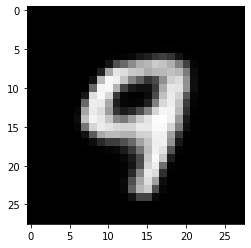

2


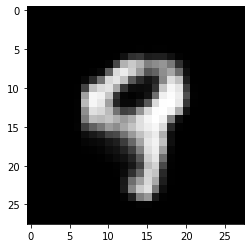

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


3


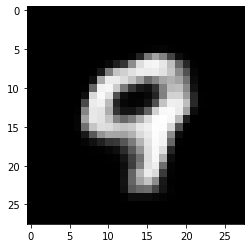

3


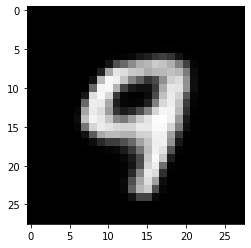

2


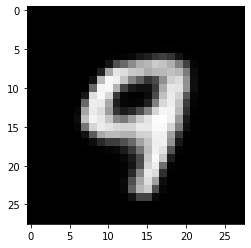

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


1


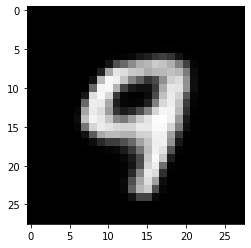

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


3


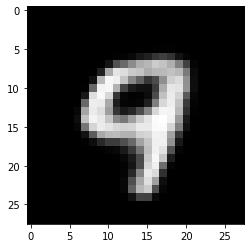

2


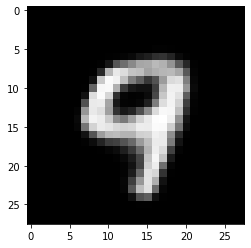

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


3


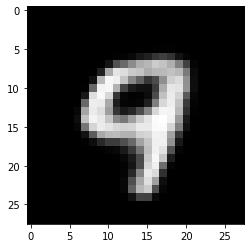

3


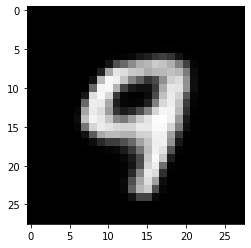

2


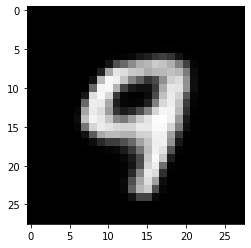

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


1


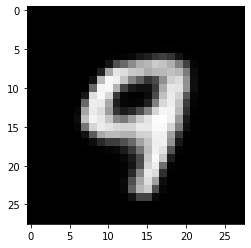

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


0


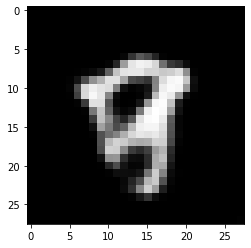

End


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


Train accuracy:
0.9919171507956555


In [528]:
model = train(Xtrain,ytrain,3,0.1,'L1','L1')

In [529]:
y=model.forward(Xtrain)
print(y.shape)
print(accuracy(y,ytrain))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


(3959, 1)
0.9919171507956555


In [536]:

XALL_test = x_train[20000:40000]
yALL_test = y_train.reshape(-1,1)[20000:40000].astype(np.int8)
y0_test = (yALL_test == 4)
y2_test = (yALL_test == 9)
ytot_test = y0_test + y2_test
Xtest = XALL_test[ytot_test.reshape(-1)]
ytest = (yALL_test[ytot_test.reshape(-1)] -6.5)/2.5

In [537]:
Xtest  = encoder.predict(Xtest)

In [538]:
Xtest = scaler.transform(Xtest.reshape(Xtest.shape[0],Xtest.shape[1]*Xtest.shape[2]*Xtest.shape[3])).reshape(Xtest.shape)


In [539]:
print(Xtest.shape)

(3966, 4, 4, 8)


In [540]:
Xtest=Xtest.reshape(Xtest.shape[0],Xtest.shape[1]*Xtest.shape[2]*Xtest.shape[3],1)

In [541]:
y=model.forward(Xtest)
print(y.shape)
print(accuracy(y,ytest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


(3966, 1)
0.9808371154815936


In [498]:
############### MNIST CODE ENDS HERE###########################

In [ ]:
a=np.asarray([1,-2,3,4])

In [ ]:
print(np.maximum(a,0))

[1 0 3 4]


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root = '. / data', train = True, download = True,transform=transform) #Training data set


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting . / data/cifar-10-python.tar.gz to . / data


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))

In [ ]:
train_dataset_array = next(iter(train_loader))[0].numpy().transpose((0,2,3,1))
train_labels = next(iter(train_loader))[1].numpy().reshape((-1,1))

In [ ]:
print(train_dataset_array.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
XALL = train_dataset_array
yALL  = train_labels

In [ ]:
y0 = (yALL == 3)
y2 = (yALL == 8)
ytot = y0 + y2
Xtrain = XALL[ytot.reshape(-1)]
ytrain = (yALL[ytot.reshape(-1)] -5.5)/2.5

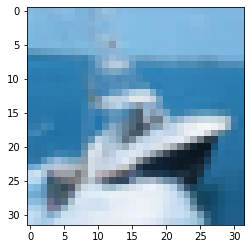

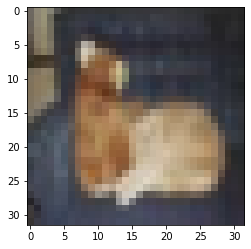

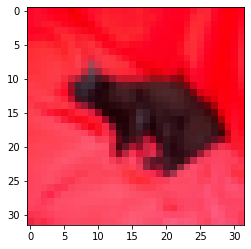

In [ ]:
Xtrain
plt.imshow(Xtrain[0], interpolation='nearest')
plt.show()
plt.imshow(Xtrain[2], interpolation='nearest')
plt.show()
plt.imshow(Xtrain[3], interpolation='nearest')
plt.show()

In [ ]:
def redoer(image, shape = (32,32), interpolation = cv2.INTER_CUBIC):
    assert(len(shape)==2)
    new_shape = (shape[1],shape[0])
    shape=new_shape
    reimage = cv2.resize(image, shape, interpolation=interpolation)
    if len(reimage.shape)==3:
        reimage = np.squeeze(np.sum(reimage,axis = 2))
        reimage = reimage.reshape((reimage.shape[0],reimage.shape[1]))
    return reimage

In [ ]:
Xtrain_resized = np.array(list(map(redoer,Xtrain)))

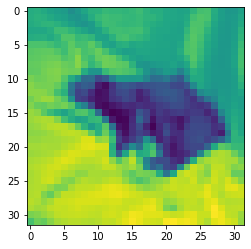

In [ ]:
plt.imshow(Xtrain_resized[3], interpolation='nearest')
plt.show()

In [ ]:
scaler = StandardScaler()
Xtrain_resized = scaler.fit_transform(Xtrain_resized.reshape(Xtrain_resized.shape[0],Xtrain_resized.shape[1]*Xtrain_resized.shape[2])).reshape(Xtrain_resized.shape)

Start
Imbalance at height 0
517
483
Recursion Done
0


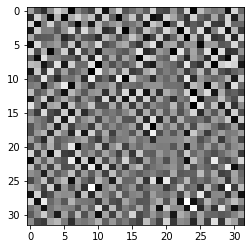

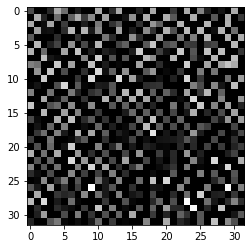

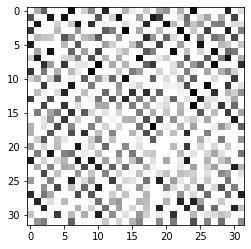

End
Train accuracy:
1.0


In [ ]:
model = train(Xtrain_resized[0:1000],ytrain[0:1000],2,0.1,'L1','L1')